<h1 align="center">CP610 Data Analysis - Group 8 - Final Project<h/1>

<h3 align="center">Project title: Breast Cancer Wisconsin (Original)</h3>

***
## Student information
 - Gia Phat Huynh (huyn8900@mylaurier.ca)
 - Thai Son Truong (truo1520@mylaurier.ca)
 - The Minh Nguyen (nguy6401@mylaurier.ca)
 ***

<h2> I. Introduction

<div style="text-align: justify">Cancer remains one of the most formidable health challenges worldwide, affecting millions of lives annually. Among the various types of cancer, breast cancer is particularly prevalent, impacting millions of women globally. It is characterized by the uncontrolled growth of abnormal cells in the breast tissue, which can metastasize to other parts of the body if not detected and treated early. Timely and accurate diagnosis is paramount for effective treatment and improved patient outcomes. Early detection and accurate diagnosis significantly enhance survival rates and the effectiveness of treatment.</div>
<br>
<div style="text-align: justify">In the realm of medical diagnostics, machine learning algorithms have emerged as vital tools in assisting healthcare professionals with early detection and classification of diseases, including cancer. These algorithms analyze complex datasets to identify patterns and anomalies that may indicate the presence of cancer. The Breast Cancer Wisconsin (Original) dataset, which includes features from fine needle aspirate (FNA) samples of breast masses, is a valuable resource for developing and testing these diagnostic algorithms. By leveraging machine learning techniques, it is possible to enhance the accuracy and efficiency of breast cancer diagnosis, ultimately contributing to better patient care and outcomes. This report aims to explore the application of machine learning models to this dataset, with the goal of improving the prediction and classification of benign and malignant breast tumors.</div>

<h2> II. Dataset Introduction

<div style="text-align: justify">The Breast Cancer Wisconsin (Original) dataset is a widely utilized dataset in medical research and machine learning, particularly in the field of breast cancer diagnosis. Collected by Dr. William H. Wolberg at the University of Wisconsin Hospitals, Madison, from 1989 to 1991, it comprises 699 instances of fine needle aspirate (FNA) samples from breast masses. Each instance is characterized by 30 features, including attributes like clump thickness, uniformity of cell size and shape, marginal adhesion, and bare nuclei. The goal is to classify these samples into benign or malignant categories. This dataset has been instrumental in developing and testing various algorithms for accurate and early detection of breast cancer.</div>
<br>
Additional Information
<br>
<div style="text-align: justify">Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed from the data itself:</div>
<br>
Group 1: 367 instances (January 1989)<br>
Group 2:  70 instances (October 1989)<br>
Group 3:  31 instances (February 1990)<br>
Group 4:  17 instances (April 1990)<br>
Group 5:  48 instances (August 1990)<br>
Group 6:  49 instances (Updated January 1991)<br>
Group 7:  31 instances (June 1991)<br>
Group 8:  86 instances (November 1991)<br>
-----------------------------------------<br>
Total:   699 points (as of the donated database on 15 July 1992)

<h2> III. Objectives

<div style="text-align: justify">The primary objective of this project is to conduct a prediction analysis on the Breast Cancer Wisconsin (Original) dataset. In this notebook, we aim to:</div><br>
1. Showcase the steps involved in data preprocessing, model training, evaluation, and interpretation.<br>
2. Provide insights into feature importance and model performance metrics relevant to cancer diagnosis.<br>
3. Demonstrate the practical implementation of machine learning models like Random Forest Classifier, Logistic Regression, SVM, etc.<br>
<br>
Our steps:
<br>
<div style="text-align: justify">Initially, the dataset will be downloaded and meticulously cleaned to address missing values, duplicates, and anomalies. Following this, a stratified random split will be performed to divide the data into training and test sets in an 80/20 ratio, ensuring preserving the benign and malignant sample distribution.</div>
<br>
<div style="text-align: justify">Next, four different machine learning models (Random Forest Classifier, Logistic Regression, SVM, KNN Classifier) will be applied, and 5-fold cross-validation will be utilized to determine the optimal hyperparameters for each model. These fine-tuned models will then be trained on the training set and evaluated on the test set, using accuracy as the primary metric for assessing the prediction of benign or malignant samples.</div>
<br>
<div style="text-align: justify">Finally, the analysis will conclude with a thorough examination of the process, supported by solid data evidence, to draw insights such as identifying key features that enhance classification accuracy, comparing model performances, and evaluating the impact of various data manipulation techniques. Visualizations will be employed throughout the project to communicate findings and improve the overall analysis effectively.</div>

<h2> IV. Data preprocessing

<h3> a) Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.exceptions import FitFailedWarning
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from scipy.stats import randint
from sklearn.metrics import accuracy_score

<h3> b) Load dataset

In [2]:
column_names=['Sample code number', 'Clump thickness', 'Uniformity of cell size', 'Uniformity of cell shape',
              'Marginal adhesion', 'Single epithelial cell size', 'Bare_nuclei', 'Bland chromatin', 'Normal nucleoli',
              'Mitoses', 'Class'
]
df = pd.read_csv('breast_cancer_wisconsin_original/breast-cancer-wisconsin.data', header=None, names=column_names)
display(df)

Sample code number  Clump thickness  Uniformity of cell size  \
0               1000025                5                        1   
1               1002945                5                        4   
2               1015425                3                        1   
3               1016277                6                        8   
4               1017023                4                        1   
..                  ...              ...                      ...   
694              776715                3                        1   
695              841769                2                        1   
696              888820                5                       10   
697              897471                4                        8   
698              897471                4                        8   

     Uniformity of cell shape  Marginal adhesion  Single epithelial cell size  \
0                           1                  1                            2   
1                           4                  5                            7   
2                           1                  1                            2   
3                           8                  1                            3   
4                           1                  3                            2   
..                        ...                ...                          ...   
694                         1                  1                            3   
695                         1                  1                            2   
696                        10                  3                            7   
697                         6                  4                            3   
698                         8                  5                            4   

    Bare_nuclei  Bland chromatin  Normal nucleoli  Mitoses  Class  
0             1                3                1        1      2  
1            10                3                2        1      2  
2             2                3                1        1      2  
3             4                3                7        1      2  
4             1                3                1        1      2  
..          ...              ...              ...      ...    ...  
694           2                1                1        1      2  
695           1                1                1        1      2  
696           3                8               10        2      4  
697           4               10                6        1      4  
698           5               10                4        1      4  

[699 rows x 11 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump thickness              699 non-null    int64 
 2   Uniformity of cell size      699 non-null    int64 
 3   Uniformity of cell shape     699 non-null    int64 
 4   Marginal adhesion            699 non-null    int64 
 5   Single epithelial cell size  699 non-null    int64 
 6   Bare_nuclei                  699 non-null    object
 7   Bland chromatin              699 non-null    int64 
 8   Normal nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [4]:
df.drop("Sample code number", axis=1, inplace = True) #Drop irrelavant variable
df.describe()

Clump thickness  Uniformity of cell size  Uniformity of cell shape  \
count       699.000000               699.000000                699.000000   
mean          4.417740                 3.134478                  3.207439   
std           2.815741                 3.051459                  2.971913   
min           1.000000                 1.000000                  1.000000   
25%           2.000000                 1.000000                  1.000000   
50%           4.000000                 1.000000                  1.000000   
75%           6.000000                 5.000000                  5.000000   
max          10.000000                10.000000                 10.000000   

       Marginal adhesion  Single epithelial cell size  Bland chromatin  \
count         699.000000                   699.000000       699.000000   
mean            2.806867                     3.216023         3.437768   
std             2.855379                     2.214300         2.438364   
min             1.000000                     1.000000         1.000000   
25%             1.000000                     2.000000         2.000000   
50%             1.000000                     2.000000         3.000000   
75%             4.000000                     4.000000         5.000000   
max            10.000000                    10.000000        10.000000   

       Normal nucleoli     Mitoses       Class  
count       699.000000  699.000000  699.000000  
mean          2.866953    1.589413    2.689557  
std           3.053634    1.715078    0.951273  
min           1.000000    1.000000    2.000000  
25%           1.000000    1.000000    2.000000  
50%           1.000000    1.000000    2.000000  
75%           4.000000    1.000000    4.000000  
max          10.000000   10.000000    4.000000

In [5]:
#Dataset mentioned the missing values in the "Bare nuclei" variable column. Let's figue it out
print(df['Bare_nuclei'].unique())

['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']


In [6]:
#Barenuclei has missing value which denoted as '?'
df['Bare_nuclei'].value_counts()

Bare_nuclei
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64

In [7]:
#Query in dataframe
df.query("Bare_nuclei == '?'")

Clump thickness  Uniformity of cell size  Uniformity of cell shape  \
23                 8                        4                         5   
40                 6                        6                         6   
139                1                        1                         1   
145                1                        1                         3   
158                1                        1                         2   
164                5                        1                         1   
235                3                        1                         4   
249                3                        1                         1   
275                3                        1                         3   
292                8                        8                         8   
294                1                        1                         1   
297                5                        4                         3   
315                4                        6                         5   
321                3                        1                         1   
411                1                        1                         1   
617                1                        1                         1   

     Marginal adhesion  Single epithelial cell size Bare_nuclei  \
23                   1                            2           ?   
40                   9                            6           ?   
139                  1                            1           ?   
145                  1                            2           ?   
158                  1                            3           ?   
164                  1                            2           ?   
235                  1                            2           ?   
249                  1                            2           ?   
275                  1                            2           ?   
292                  1                            2           ?   
294                  1                            2           ?   
297                  1                            2           ?   
315                  6                            7           ?   
321                  1                            2           ?   
411                  1                            1           ?   
617                  1                            1           ?   

     Bland chromatin  Normal nucleoli  Mitoses  Class  
23                 7                3        1      4  
40                 7                8        1      2  
139                2                1        1      2  
145                2                1        1      2  
158                1                1        1      2  
164                3                1        1      2  
235                3                1        1      2  
249                3                1        1      2  
275                2                1        1      2  
292                6               10        1      4  
294                2                1        1      2  
297                2                3        1      2  
315                4                9        1      2  
321                3                1        1      2  
411                2                1        1      2  
617                1                1        1      2

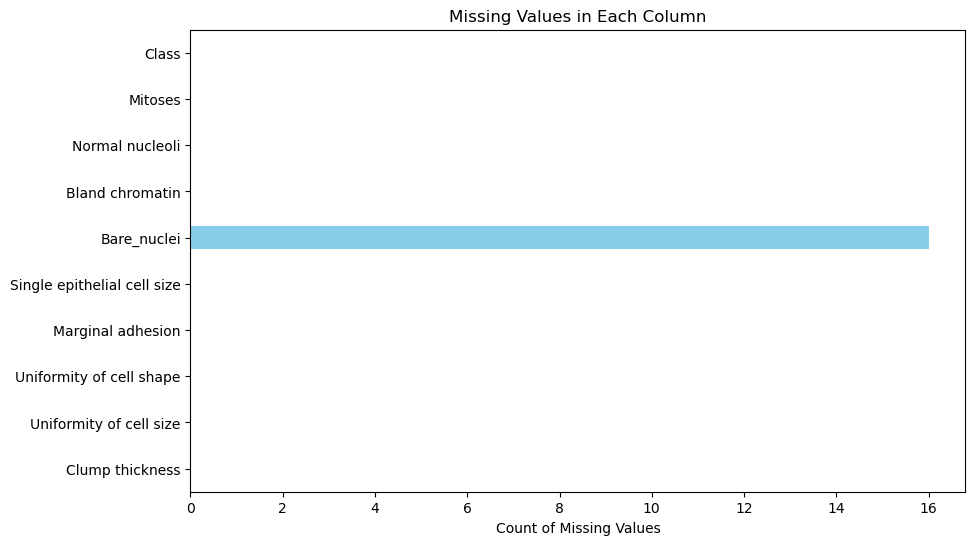

In [8]:
# Replace '?' with NaN
df['Bare_nuclei'].replace('?', pd.NA, inplace=True)

# Bar plot of missing values
missing_values_count = df.isnull().sum()
plt.figure(figsize=(10, 6))
missing_values_count.plot(kind='barh', color='skyblue')
plt.title('Missing Values in Each Column')
plt.xlabel('Count of Missing Values')
plt.show()

In [9]:
# Convert 'Bare nuclei" columns to numeric, forcing errors to NaN
df['Bare_nuclei'] = pd.to_numeric(df['Bare_nuclei'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump thickness              699 non-null    int64  
 1   Uniformity of cell size      699 non-null    int64  
 2   Uniformity of cell shape     699 non-null    int64  
 3   Marginal adhesion            699 non-null    int64  
 4   Single epithelial cell size  699 non-null    int64  
 5   Bare_nuclei                  683 non-null    float64
 6   Bland chromatin              699 non-null    int64  
 7   Normal nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [10]:
# Fill missing values with the mean of each column
df['Bare_nuclei'] = df['Bare_nuclei'].fillna(df['Bare_nuclei'].mean())
df['Bare_nuclei'].value_counts()

Bare_nuclei
1.000000     402
10.000000    132
2.000000      30
5.000000      30
3.000000      28
8.000000      21
4.000000      19
3.544656      16
9.000000       9
7.000000       8
6.000000       4
Name: count, dtype: int64

<h3> c) Exploratory data analysis

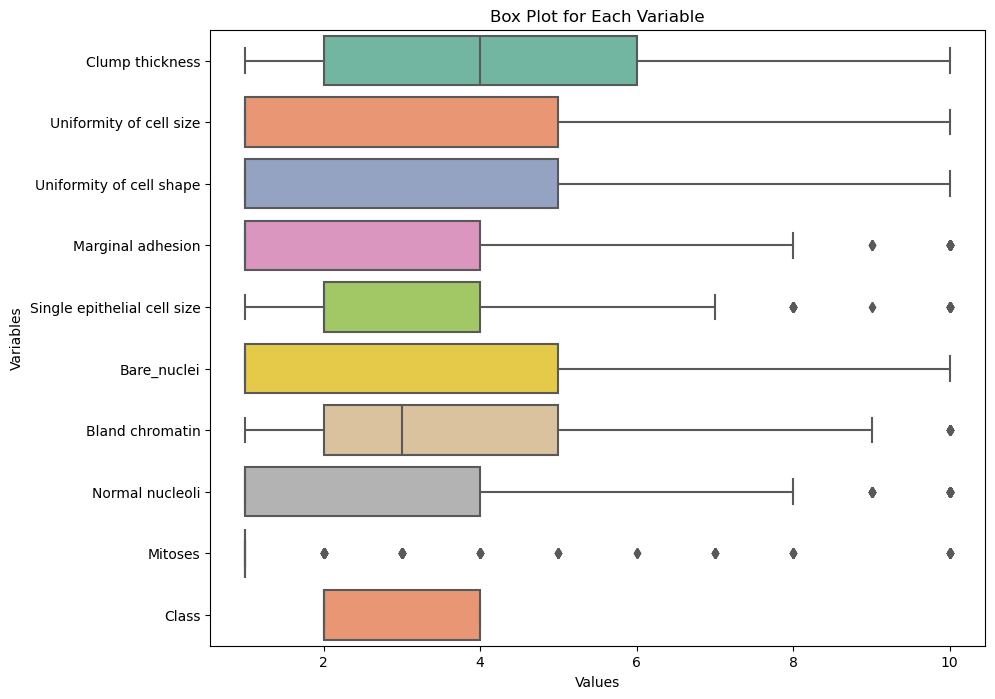

In [11]:
# Suppress specific warning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Crate a box plot for each variable in the dataset
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, palette='Set2', orient='h')
plt.title('Box Plot for Each Variable')
plt.xlabel('Values')
plt.ylabel('Variables')
plt.show()

In [12]:
#Detect outliners
for var in df.columns:
    # Calculate quartiles and IQR
    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    iqr = q3 - q1
    
    # Calculate lower and upper bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    # Detect outliers
    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]
    
    # Display count of outliers
    print(f"Number of outliers for variable {var}: {len(outliers)}")

Number of outliers for variable Clump thickness: 0
Number of outliers for variable Uniformity of cell size: 0
Number of outliers for variable Uniformity of cell shape: 0
Number of outliers for variable Marginal adhesion: 60
Number of outliers for variable Single epithelial cell size: 54
Number of outliers for variable Bare_nuclei: 0
Number of outliers for variable Bland chromatin: 20
Number of outliers for variable Normal nucleoli: 77
Number of outliers for variable Mitoses: 120
Number of outliers for variable Class: 0


In [13]:
data = df
data.head(10)

Clump thickness  Uniformity of cell size  Uniformity of cell shape  \
0                5                        1                         1   
1                5                        4                         4   
2                3                        1                         1   
3                6                        8                         8   
4                4                        1                         1   
5                8                       10                        10   
6                1                        1                         1   
7                2                        1                         2   
8                2                        1                         1   
9                4                        2                         1   

   Marginal adhesion  Single epithelial cell size  Bare_nuclei  \
0                  1                            2          1.0   
1                  5                            7         10.0   
2                  1                            2          2.0   
3                  1                            3          4.0   
4                  3                            2          1.0   
5                  8                            7         10.0   
6                  1                            2         10.0   
7                  1                            2          1.0   
8                  1                            2          1.0   
9                  1                            2          1.0   

   Bland chromatin  Normal nucleoli  Mitoses  Class  
0                3                1        1      2  
1                3                2        1      2  
2                3                1        1      2  
3                3                7        1      2  
4                3                1        1      2  
5                9                7        1      4  
6                3                1        1      2  
7                3                1        1      2  
8                1                1        5      2  
9                2                1        1      2

In [14]:
# Ensure all columns are of numeric type
data = data.apply(pd.to_numeric, errors='coerce')
data['Class'] = data['Class'].map({2: 'Benign', 4: 'Malignant'})

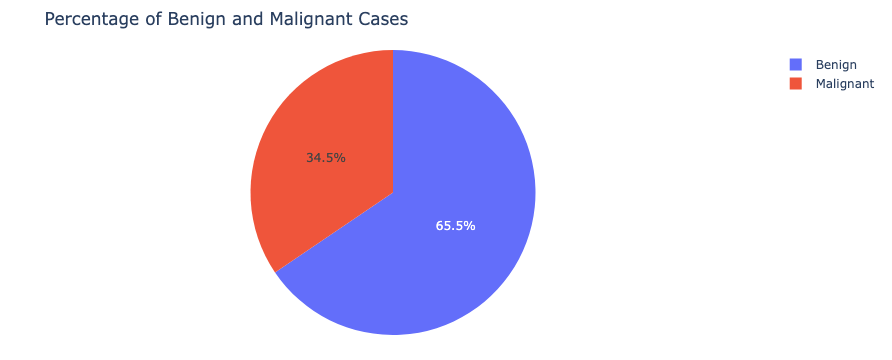

In [15]:
# Count the occurrences of each class
class_counts = data['Class'].value_counts().reset_index()
class_counts.columns = ['Class', 'Count']

fig_class_pie = px.pie(
    class_counts, 
    names='Class', 
    values='Count',
    title='Percentage of Benign and Malignant Cases',
    color_discrete_map={'Malignant': 'red', 'Benign': 'skyblue'}
)
fig_class_pie.update_layout(
    margin=dict(t=50, l=25, r=25, b=25)
)
fig_class_pie.show()

The pie chart indicates the percentage of Benign and Malignant cases in the dataset. Compared to the “Benign” which stands at 65.5%, the rate of “Malignant” class is lower (34.5%).

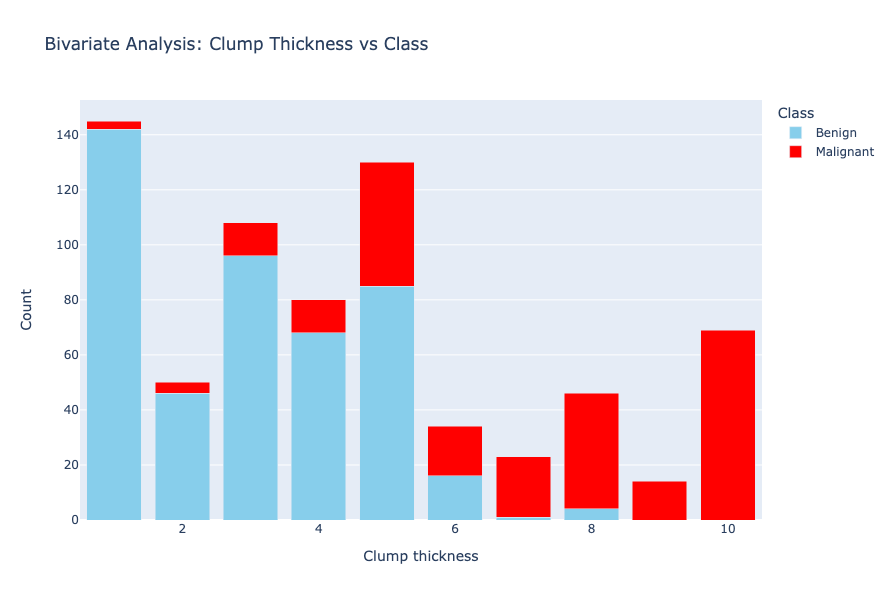

In [16]:
# Group the data by Clump_Thickness and Class and count the occurrences
count_data = data.groupby(['Clump thickness', 'Class']).size().reset_index(name='Count')

fig = px.bar(
    count_data, 
    x='Clump thickness', 
    y='Count', 
    color='Class',
    title='Bivariate Analysis: Clump Thickness vs Class',
    labels={'Clump_Thickness': 'Clump Thickness', 'Count': 'Count', 'Class': 'Class'},
    color_discrete_map={'Malignant': 'red', 'Benign': 'skyblue'},
    barmode='stack',
    height = 600)

fig.show()

In the 'Bivariate Analysis: Clump Thickness vs Class' bar chart, we can see that the increased clump thickness is associated to the higher risk of malignancy.

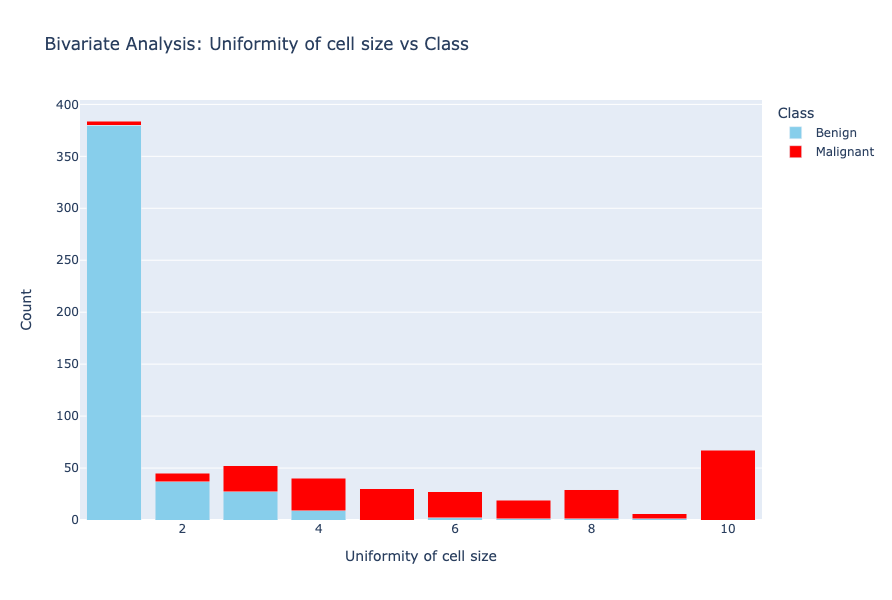

In [17]:
# Group the data by Uniformity of cell size and Class and count the occurrences
count_data = data.groupby(['Uniformity of cell size', 'Class']).size().reset_index(name='Count')

fig = px.bar(
    count_data, 
    x='Uniformity of cell size', 
    y='Count', 
    color='Class',
    title='Bivariate Analysis: Uniformity of cell size vs Class',
    labels={'Uniformity of cell size': 'Uniformity of cell size', 'Count': 'Count', 'Class': 'Class'},
    color_discrete_map={'Malignant': 'red', 'Benign': 'skyblue'},
    barmode='stack',
    height = 600)

fig.show()

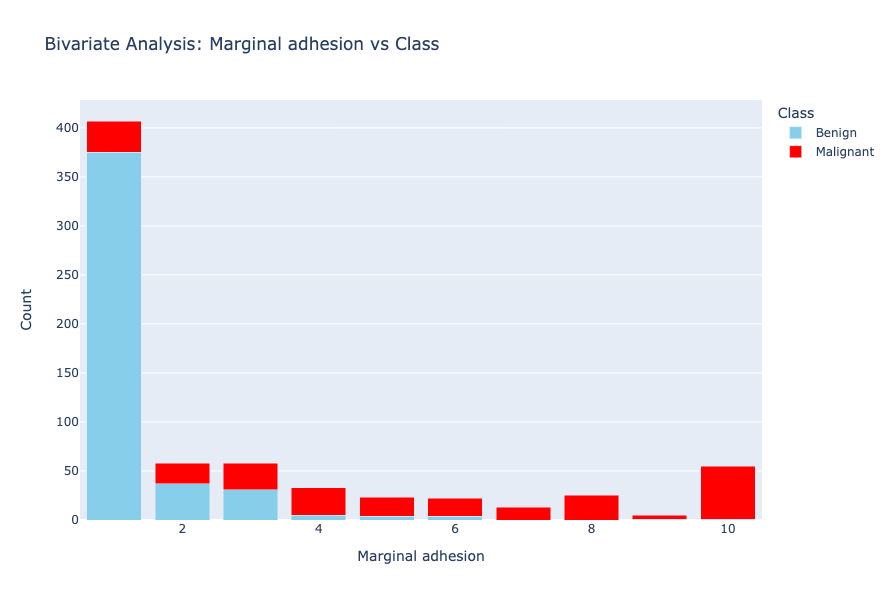

In [20]:
# Group the data by Marginal adhesion and Class and count the occurrences
count_data = data.groupby(['Marginal adhesion', 'Class']).size().reset_index(name='Count')

fig = px.bar(
    count_data, 
    x='Marginal adhesion', 
    y='Count', 
    color='Class',
    title='Bivariate Analysis: Marginal adhesion vs Class',
    labels={'Marginal adhesion': 'Marginal adhesion', 'Count': 'Count', 'Class': 'Class'},
    color_discrete_map={'Malignant': 'red', 'Benign': 'skyblue'},
    barmode='stack',
    height = 600)

fig.show()

The “Bivariate Analysis: Marginal adhesion vs Class” bar chart also show the higher risk of malignancy when the marginal adhesion rises from 0 to 10.

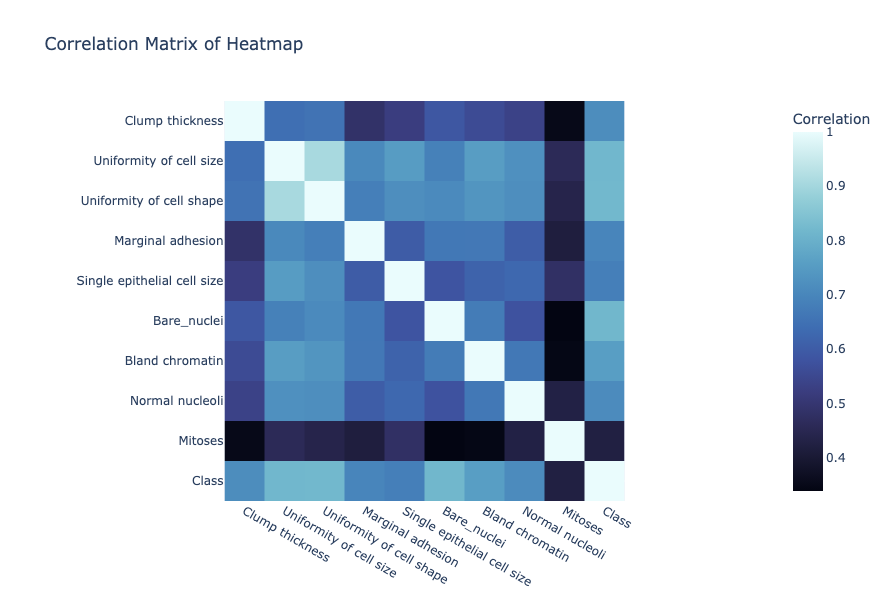

In [21]:
correlation_matrix = df.corr()

# Create the heatmap using Plotly
fig_corr = px.imshow(
    correlation_matrix,
    labels=dict(color="Correlation"),
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    color_continuous_scale='ice',
    height = 600,
    title='Correlation Matrix of Heatmap'
)

# Show the heatmap
fig_corr.show()

The picture illustrates the correlation matrix of heatmap.
<div style="text-align: justify">The variable "clump thickness" shows the highest positive correlation with the "class" variable (0.7160), indicating that increased clump thickness is associated with a higher likelihood of malignancy.</div>
<br>
<div style="text-align: justify">Similarly, "size_uniformity" and "shape_uniformity" have strong positive correlations with the "class" variable (0.8179 and 0.8189, respectively), suggesting that larger and more irregularly shaped cells are more likely to be malignant.</div>
<br>
<div style="text-align: justify">Additionally, variables such as "bare nuclei," "bland chromatin," and "normal nucleoli" exhibit moderate positive correlations with the "class" variable, highlighting their influence on tumor classification.</div>
<br>
<div style="text-align: justify">In contrast, the variable "mitoses" has a lower positive correlation with the "class" variable (0.4231), indicating a weaker association.

<h3> d) Data features and data targets

In [57]:
#Data features and data targets
data_features = df.iloc[:,0:9]
display(data_features)

data_targets = df.iloc[:,9]
display(data_targets)

Clump thickness  Uniformity of cell size  Uniformity of cell shape  \
0                  5                        1                         1   
1                  5                        4                         4   
2                  3                        1                         1   
3                  6                        8                         8   
4                  4                        1                         1   
..               ...                      ...                       ...   
694                3                        1                         1   
695                2                        1                         1   
696                5                       10                        10   
697                4                        8                         6   
698                4                        8                         8   

     Marginal adhesion  Single epithelial cell size  Bare_nuclei  \
0                    1                            2          1.0   
1                    5                            7         10.0   
2                    1                            2          2.0   
3                    1                            3          4.0   
4                    3                            2          1.0   
..                 ...                          ...          ...   
694                  1                            3          2.0   
695                  1                            2          1.0   
696                  3                            7          3.0   
697                  4                            3          4.0   
698                  5                            4          5.0   

     Bland chromatin  Normal nucleoli  Mitoses  
0                  3                1        1  
1                  3                2        1  
2                  3                1        1  
3                  3                7        1  
4                  3                1        1  
..               ...              ...      ...  
694                1                1        1  
695                1                1        1  
696                8               10        2  
697               10                6        1  
698               10                4        1  

[699 rows x 9 columns]

0      2
1      2
2      2
3      2
4      2
      ..
694    2
695    2
696    4
697    4
698    4
Name: Class, Length: 699, dtype: int64

In [58]:
X = data_features
y = data_targets
y = y[X.index] #To ensure targets are aligned with features

<h3> e) Train_test_split

In [59]:
#Stratify train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

<h3> f) Data standardization

In [60]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<h2> V. Model training and evaluation

<h3>a) Random Forest Classifier

In [65]:
# Ignore UserWarning
warnings.filterwarnings("ignore", category=UserWarning)
# Ignore FitFailedWarning
warnings.filterwarnings("ignore", category=FitFailedWarning)

#Initial model
rf = RandomForestClassifier()

# #Hyperparameter tuning using RandomizedSearchCV with 5-fold cross-validation
# param_dist_rf = {
#     'n_estimators': [50, 100, 200],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth': [4, 6, 8, 10, 12],
#     'criterion': ['gini', 'entropy']
# }

n_estimators_rf = [int(x) for x in np.linspace(start = 10, stop = 500, num = 50)]
max_depth_rf = [int(x) for x in np.linspace(start = 8, stop = 80, num = 10)]
max_depth_rf.append(None)
bootstrap_rf = [True, False]
min_samples_leaf_rf = range(1, 10, 1)
min_samples_split_rf = range(2, 10, 1)

param_dist_rf = {
    'n_estimators': n_estimators_rf,
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': max_depth_rf,
    'criterion': ['gini', 'entropy'],
    'bootstrap': bootstrap_rf,
    'min_samples_leaf': min_samples_leaf_rf,
    'min_samples_split': min_samples_split_rf
}

rcv_rf = RandomizedSearchCV(rf, param_distributions=param_dist_rf, n_iter=500, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)

#Fit model
rcv_rf.fit(X_train, y_train)

#Best estimator
best_rcv_rf = rcv_rf.best_estimator_

#Prediction
y_pred_rcv_rf = best_rcv_rf.predict(X_test)

#Evaluate model
accuracy_rcv_rf = accuracy_score(y_test, y_pred_rcv_rf)

#Print result
print(f"Best Random Forest Classifier parameters (RandomizedSeachCV): {rcv_rf.best_params_}")
print("Random Forest Classifier Test Accuracy (RandomizedSeachCV): %.2f" %accuracy_rcv_rf)

Best Random Forest Classifier parameters (RandomizedSeachCV): {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 8, 'criterion': 'entropy', 'bootstrap': True}
Random Forest Classifier Test Accuracy (RandomizedSeachCV): 0.96


<h3>b) Logistic Regression

In [66]:
# Ignore UserWarning
warnings.filterwarnings("ignore", category=UserWarning)
# Ignore FitFailedWarning
warnings.filterwarnings("ignore", category=FitFailedWarning)

#Initial model
log_reg = LogisticRegression()

# Hyperparameter tuning using GridSearchCV with 5-fold cross-validation
param_grid_log_reg = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}
cv_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5, scoring='accuracy')

#Fit model
cv_log_reg.fit(X_train, y_train)

#Best estimator
best_log_reg = cv_log_reg.best_estimator_

#Prediction
y_pred_log_reg = best_log_reg.predict(X_test)

#Evaluate model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

#Print result
print(f"Best Logistic Regression parameters: {cv_log_reg.best_params_}")
print("Logistic Regression Test Accuracy: %.5f" %accuracy_log_reg)

Best Logistic Regression parameters: {'C': 1, 'solver': 'liblinear'}
Logistic Regression Test Accuracy: 0.95000


<h3>c) Support Vector Machines (SVM)

In [67]:
# Ignore UserWarning
warnings.filterwarnings("ignore", category=UserWarning)
# Ignore FitFailedWarning
warnings.filterwarnings("ignore", category=FitFailedWarning)

#Initial model
svm = SVC()

# Hyperparameter tuning using GridSearchCV with 5-fold cross-validation
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf']
}
cv_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy')

#Fit model
cv_svm.fit(X_train, y_train)

#Best estimator
best_svm = cv_svm.best_estimator_

#Prediction
y_pred_svm = best_svm.predict(X_test)

#Evaluate result
accuracy_svm = accuracy_score(y_test, y_pred_svm)

#Print result
print(f"Best SVM parameters: {cv_svm.best_params_}")
print("SVM Test Accuracy: %.5f" %accuracy_svm)

Best SVM parameters: {'C': 10, 'gamma': 1, 'kernel': 'linear'}
SVM Test Accuracy: 0.95714


<h2> VI. Feature Importance Visualization

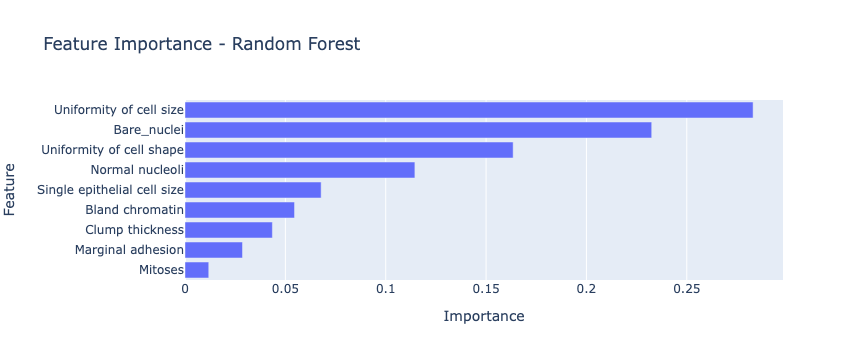

In [68]:
# Feature importance from Random Forest model
feature_importance = best_rcv_rf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualization
fig_feature_impt = px.bar(importance_df, x='Importance', y='Feature', orientation='h', title='Feature Importance - Random Forest')
fig_feature_impt.update_layout(yaxis={'categoryorder':'total ascending'})
fig_feature_impt.show()

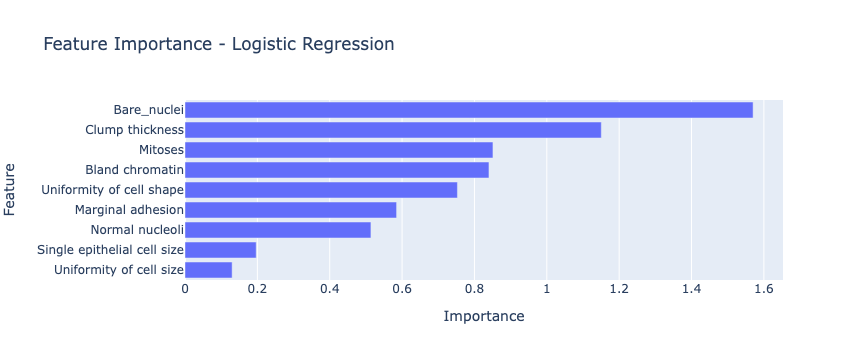

In [69]:
# Feature importance from Logistic Regression model
coefficients = best_log_reg.coef_.flatten()
feature_names = X.columns
importance_df_logistic = pd.DataFrame({'Feature': feature_names, 'Importance': coefficients})
importance_df_logistic = importance_df_logistic.sort_values(by='Importance', ascending=False)

# Visualization
fig_feature_impt_logistic = px.bar(importance_df_logistic, x='Importance', y='Feature', orientation='h', title='Feature Importance - Logistic Regression')
fig_feature_impt_logistic.update_layout(yaxis={'categoryorder':'total ascending'})
fig_feature_impt_logistic.show()

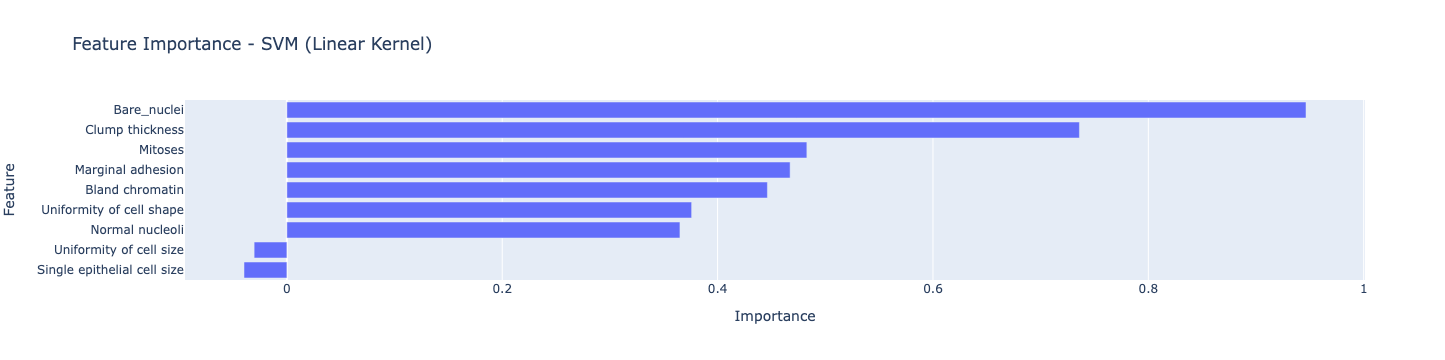

In [70]:
# Feature importance from SVM model
# Get coefficients from SVM model with linear kernel
coefficients = best_svm.coef_.flatten()
feature_names = X.columns
importance_df_svm = pd.DataFrame({'Feature': feature_names, 'Importance': coefficients})
importance_df_svm = importance_df_svm.sort_values(by='Importance', ascending=False)

# Visualization
fig_feature_impt_svm = px.bar(importance_df_svm, x='Importance', y='Feature', orientation='h', title='Feature Importance - SVM (Linear Kernel)')
fig_feature_impt_svm.update_layout(yaxis={'categoryorder':'total ascending'})
fig_feature_impt_svm.show()

<h2> VII. Conclusion

<div style="text-align: justify">In this project, we have explored Dr. Wolberg's dataset on breast cancer, consisting of 699 samples of breast masses, with each sample being characterized by 30 features - 10 of which are used to describe samples, as noted by Wolberg (1990). By using this dataset, we attempted to train several models to predict whether a sample of breast mass is benign (non-cancerous) or malignant (cancerous).</div><br>
<div style="text-align: justify">TThrough examining the dataset, we have found the column "Sample code number" to be irrelevant to our task, as it is not part of the samples' characteristics, and as such have dropped the column. We have also discovered that for 16 samples, the value of the feature "Bare nuclei" is "?". To rectify this issue, we have converted those values into numeric values by replacing them with "NaN" values, before filling them with the mean of the feature. Additionally, we attempted to detect outliers in each feature using the Inter-quartile (IQR) measurement. However, after careful consideration, we have decided not to remove any outliers, as human bodies are diverse, and as such, all samples are critical for our models to learn, in order to better identify future breast samples. Also, the number of outlier samples is not minor, and outliers are not specific enough to carry on a further deep-dive analysis. So, we leave them intact.</div><br>
<div style="text-align: justify">After cleaning the dataset, we proceeded to select and train three models: random forest classifier, logistic regression, and Support Vector Machine (SVM). To prepare the training and testing data, using stratified random split, we've split the data such that 80% of the data is used as training data, and the remaining 20% as testing data. For each model, we used 5-fold cross-validation to determine the optimal hyperparameters, before training them on the training dataset and evaluating them on the testing dataset. Each model’s performance is evaluated based on accuracy. The results are as follows:</div><br>
<div>- -	Random Forest Classifier (params: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 8, 'criterion': 'entropy', 'bootstrap': True}): 0.96<br>
-	Logistic Regression (params: {'C': 1, 'solver': 'liblinear'}): 0.95<br>
-	SVM (params: {'C': 10, 'gamma': 1, 'kernel': 'linear'}): 0.95714</div><br>
<div style="text-align: justify">Also, we compared our results to the baseline model performance to have the better evaluation on our models.As can be seen from the results above and the “baseline model performance” line chart, the models performed reasonably well, falling within our expectations. 
Breaking down the importance of each feature to each model, the feature “Bare_nuclei” seems to be consistently one of the most important features, ranking within the top two for each model.</div>

<h2> VIII. References

This breast cancer databases was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg.<br>
<div style="text-align: justify">1. O. L. Mangasarian and W. H. Wolberg: "Cancer diagnosis via linear programming", SIAM News, Volume 23, Number 5, September 1990, pp 1 & 18.</div>
<div style="text-align: justify">2. William H. Wolberg and O.L. Mangasarian: "Multisurface method of pattern separation for medical diagnosis applied to breast cytology", Proceedings of the National Academy of Sciences, U.S.A., Volume 87, December 1990, pp 9193-9196.</div>
<div style="text-align: justify">3. O. L. Mangasarian, R. Setiono, and W.H. Wolberg: "Pattern recognition via linear programming: Theory and application to medical diagnosis", in: "Large-scale numerical optimization", Thomas F. Coleman and Yuying Li, editors, SIAM Publications, Philadelphia 1990, pp 22-30.</div>
<div style="text-align: justify">4. K. P. Bennett & O. L. Mangasarian: "Robust linear programming discrimination of two linearly inseparable sets", Optimization Methods and Software 1, 1992, 23-34 (Gordon & Breach Science Publishers).</div>

<center>__End of document__</center>